In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
import torch
from torchsummary import summary
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from itertools import product

In [3]:
data_new = pandas.read_pickle("./pickeddata.pkl")
data_new

,Date for US Imports and Exports,Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),Date for Retail Gas Price,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Season
0,9-Nov-01,10772,9639,1133,12-Nov-01,1.224,autumn
1,16-Nov-01,10243,8879,1364,19-Nov-01,1.208,autumn
2,23-Nov-01,9576,8187,1389,26-Nov-01,1.168,autumn
3,30-Nov-01,11170,9856,1314,3-Dec-01,1.149,autumn
4,7-Dec-01,9885,8966,919,10-Dec-01,1.136,winter
...,...,...,...,...,...,...,...
1137,25-Aug-23,-1684,2089,-3773,28-Aug-23,3.931,summer
1138,1-Sep-23,-2593,1838,-4432,4-Sep-23,3.925,autumn
1139,8-Sep-23,431,4492,-4061,11-Sep-23,3.941,autumn
1140,15-Sep-23,-2290,1450,-3741,18-Sep-23,4.001,autumn


In [4]:
season = {'spring': 0, 'summer': 1, 'autumn':2, 'winter': 3}
data_new.Season = [season[i] for i in data_new.Season]
data_new

,Date for US Imports and Exports,Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),Date for Retail Gas Price,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Season
0,9-Nov-01,10772,9639,1133,12-Nov-01,1.224,2
1,16-Nov-01,10243,8879,1364,19-Nov-01,1.208,2
2,23-Nov-01,9576,8187,1389,26-Nov-01,1.168,2
3,30-Nov-01,11170,9856,1314,3-Dec-01,1.149,2
4,7-Dec-01,9885,8966,919,10-Dec-01,1.136,3
...,...,...,...,...,...,...,...
1137,25-Aug-23,-1684,2089,-3773,28-Aug-23,3.931,1
1138,1-Sep-23,-2593,1838,-4432,4-Sep-23,3.925,2
1139,8-Sep-23,431,4492,-4061,11-Sep-23,3.941,2
1140,15-Sep-23,-2290,1450,-3741,18-Sep-23,4.001,2


In [5]:
XY=data_new[['Date for US Imports and Exports','Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day)','Season','Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)']].dropna(axis='index')
(feature1,featurename1)=('Date for US Imports and Exports',"Year")
(feature2,featurescale,featurename2)=('Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day)',1000,"Exports")
(feature3,featurename3)=('Season','Season')
(label,labelname)=('Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)',"Prices (Dollars per Gallon)")

XY.columns=[featurename1,featurename2,featurename3,labelname]
XY[featurename1]=pandas.to_datetime(XY[featurename1]).dt.year

print(XY)

X=XY[[featurename1,featurename2,featurename3]].squeeze()
Y=XY[labelname].squeeze()
print(X)
print(Y)

      Year  Exports  Season  Prices (Dollars per Gallon)
0     2001    10772       2                        1.224
1     2001    10243       2                        1.208
2     2001     9576       2                        1.168
3     2001    11170       2                        1.149
4     2001     9885       3                        1.136
...    ...      ...     ...                          ...
1137  2023    -1684       1                        3.931
1138  2023    -2593       2                        3.925
1139  2023      431       2                        3.941
1140  2023    -2290       2                        4.001
1141  2023    -1706       2                        3.963

[1142 rows x 4 columns]
      Year  Exports  Season
0     2001    10772       2
1     2001    10243       2
2     2001     9576       2
3     2001    11170       2
4     2001     9885       3
...    ...      ...     ...
1137  2023    -1684       1
1138  2023    -2593       2
1139  2023      431       2
1140  2023 

In [6]:
X = X.values
Y = Y.values

In [7]:
# Split the data
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [9]:
#for mini-batch training
class Build_Data(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

dataset = Build_Data(x_train_tensor,y_train_tensor)

**Optimizer Comparison and Hyperparameter Tuning**

Comparing between 3 and 4 layers with neuron of 4,8,16,32

In [10]:
class pricePredictor_3layer(torch.nn.Module):
    def __init__(self,l1,l2):
        super(pricePredictor_3layer, self).__init__()
        self.fc1 = torch.nn.Linear(3, l1)
        self.fc2 = torch.nn.Linear(l1, l2)
        self.fc3 = torch.nn.Linear(l2, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
class pricePredictor_4layer(torch.nn.Module):
    def __init__(self,l1,l2,l3):
        super(pricePredictor_4layer, self).__init__()
        self.fc1 = torch.nn.Linear(3, l1)
        self.fc2 = torch.nn.Linear(l1, l2)
        self.fc3 = torch.nn.Linear(l2, l3)
        self.fc4 = torch.nn.Linear(l3, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [12]:
def main_model_training(param_m,lr_val,layer,batch_s,epoch,optimizer_select):
    model=None
    train_loader=None
    optimizer=None
    if layer==4:
      model=pricePredictor_4layer(param_m[0],param_m[1],param_m[2])
    else:
      model=pricePredictor_3layer(param_m[0],param_m[1])
    Loss = torch.nn.MSELoss()

    if batch_s!=float('inf'):
      train_loader = DataLoader(dataset=dataset, batch_size=batch_s)
    if optimizer_select=='Adam':
      optimizer = torch.optim.Adam(model.parameters(), lr=lr_val)
    elif optimizer_select=='SGD':
      optimizer = torch.optim.SGD(model.parameters(), lr=lr_val)
    elif optimizer_select=='RMSprop':
      optimizer = torch.optim.RMSprop(model.parameters(), lr=lr_val)

    train_losses = []
    val_losses = []
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
    model.to(device)
    num_epochs = epoch
    for epoch in range(num_epochs):
        if batch_s!=float('inf'):
            for x, y in train_loader:
              model.train()
              optimizer.zero_grad()
              outputs = model(x.to(device))
              loss = Loss(outputs.to(device), y.to(device))
              loss.backward()
              optimizer.step()
              train_losses.append(loss.item())
        else:
            model.train()
            optimizer.zero_grad()
            outputs = model(x_train_tensor.to(device))
            loss = Loss(outputs, y_train_tensor.to(device))
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        model.eval()
        val_outputs = model(x_val_tensor.to(device))
        val_loss = Loss(val_outputs, y_val_tensor.to(device))
        val_losses.append(val_loss.item())

        if epoch % 10 == 0:
          print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")
    return model,train_losses,val_losses

In [13]:
def train_model_layer(param_m,lr_val,layer,batch_s,epoch_num,optimizer_select):
    dict_param={}
    for i in range(len(param_m)):
        save_loss={}
        dict_loss={}
        for j in range(len(lr_val)):
            _,train_losses,val_losses=main_model_training(param_m[i],lr_val[j],layer,batch_s,epoch_num,optimizer_select)
            save_loss[j]=val_losses[-1]
        min_key = min(save_loss, key=save_loss.get)
        min_value = save_loss[min_key]
        dict_loss[min_key]=min_value
        dict_param[i]=dict_loss
    return dict_param

In [14]:
def find_min(data):
  min_value = float('inf')
  min_key = None

  for key, inner_dict in data.items():
      for inner_key, value in inner_dict.items():
          if value < min_value:
              min_value = value
              min_key = key
  return min_key

In [15]:
lr_set=[0.00001,0.00002,0.00003,0.00004,0.00005,0.00006,0.00007,0.00008,0.00009,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
# Define the set of numbers
node_no = [4,8,16,32]
perms_3layer = product(node_no, repeat=2)
perms_3layer_list = list(perms_3layer)
print(perms_3layer_list)
perms_4layer = product(node_no, repeat=3)
perms_4layer_list = list(perms_4layer)
print(perms_4layer_list)

[(4, 4), (4, 8), (4, 16), (4, 32), (8, 4), (8, 8), (8, 16), (8, 32), (16, 4), (16, 8), (16, 16), (16, 32), (32, 4), (32, 8), (32, 16), (32, 32)]
[(4, 4, 4), (4, 4, 8), (4, 4, 16), (4, 4, 32), (4, 8, 4), (4, 8, 8), (4, 8, 16), (4, 8, 32), (4, 16, 4), (4, 16, 8), (4, 16, 16), (4, 16, 32), (4, 32, 4), (4, 32, 8), (4, 32, 16), (4, 32, 32), (8, 4, 4), (8, 4, 8), (8, 4, 16), (8, 4, 32), (8, 8, 4), (8, 8, 8), (8, 8, 16), (8, 8, 32), (8, 16, 4), (8, 16, 8), (8, 16, 16), (8, 16, 32), (8, 32, 4), (8, 32, 8), (8, 32, 16), (8, 32, 32), (16, 4, 4), (16, 4, 8), (16, 4, 16), (16, 4, 32), (16, 8, 4), (16, 8, 8), (16, 8, 16), (16, 8, 32), (16, 16, 4), (16, 16, 8), (16, 16, 16), (16, 16, 32), (16, 32, 4), (16, 32, 8), (16, 32, 16), (16, 32, 32), (32, 4, 4), (32, 4, 8), (32, 4, 16), (32, 4, 32), (32, 8, 4), (32, 8, 8), (32, 8, 16), (32, 8, 32), (32, 16, 4), (32, 16, 8), (32, 16, 16), (32, 16, 32), (32, 32, 4), (32, 32, 8), (32, 32, 16), (32, 32, 32)]


SGD

In [ ]:
#3layers with sgd
performance_sgd3=train_model_layer(perms_3layer_list,lr_set,3,128,300,'SGD')

best_case_3layer_sgd=find_min(performance_sgd3)
print('best_case_3layer_sgd',best_case_3layer_sgd)
best_param_3layer_sgd=perms_3layer_list[best_case_3layer_sgd]
print('best_param_3layer_sgd',best_param_3layer_sgd)
best_lr_3layer_sgd_idx=list(performance_sgd3[best_case_3layer_sgd].keys())[0]
best_lr_3layer_sgd=lr_set[best_lr_3layer_sgd_idx]
print('best_lr_3layer_sgd',best_lr_3layer_sgd)
best_loss_3layer_sgd=performance_sgd3[best_case_3layer_sgd][best_lr_3layer_sgd_idx]
print('best_loss_3layer_sgd',best_loss_3layer_sgd)

#(4, 32)
#0.007
#best_loss_3layer_sgd=0.527089536190033

In [ ]:
#4layers with sgd
performance_sgd4=train_model_layer(perms_4layer_list,lr_set,4,128,300,'SGD')
best_case_4layer_sgd=find_min(performance_sgd4)
print('best_case_4layer_sgd',best_case_4layer_sgd)
best_param_4layer_sgd=perms_4layer_list[best_case_4layer_sgd]
print('best_param_4layer_sgd',best_param_4layer_sgd)
best_lr_4layer_sgd_idx=list(performance_sgd4[best_case_4layer_sgd].keys())[0]
best_lr_4layer_sgd=lr_set[best_lr_4layer_sgd_idx]
print('best_lr_4layer_sgd',best_lr_4layer_sgd)
best_loss_4layer_sgd=performance_sgd4[best_case_4layer_sgd][best_lr_4layer_sgd_idx]
print('best_loss_4layer_sgd',best_loss_4layer_sgd)

#(8, 4, 8)
#3e-05
#best_loss_4layer_sgd=0.42001083493232727

Adam

In [ ]:
#3layers with adam
performance_adam3=train_model_layer(perms_3layer_list,lr_set,3,128,300,'Adam')
best_case_3layer_adam=find_min(performance_adam3)
print('best_case_3layer_adam',best_case_3layer_adam)
best_param_3layer_adam=perms_3layer_list[best_case_3layer_adam]
print('best_param_3layer_adam',best_param_3layer_adam)
best_lr_3layer_adam_idx=list(performance_adam3[best_case_3layer_adam].keys())[0]
best_lr_3layer_adam=lr_set[best_lr_3layer_adam_idx]
print('best_lr_3layer_adam',best_lr_3layer_adam)
best_loss_3layer_adam=performance_adam3[best_case_3layer_adam][best_lr_3layer_adam_idx]
print('best_loss_3layer_adam',best_loss_3layer_adam)

#(4, 16)
#0.0007
#best_loss_3layer_adam=0.41511964797973633

In [ ]:
#4layers with adam
performance_adam4=train_model_layer(perms_4layer_list,lr_set,4,128,300,'Adam')
best_case_4layer_adam=find_min(performance_adam4)
print('best_case_4layer_adam',best_case_4layer_adam)
best_param_4layer_adam=perms_4layer_list[best_case_4layer_adam]
print('best_param_4layer_adam',best_param_4layer_adam)
best_lr_4layer_adam_idx=list(performance_adam4[best_case_4layer_adam].keys())[0]
best_lr_4layer_adam=lr_set[best_lr_4layer_adam_idx]
print('best_lr_4layer_adam',best_lr_4layer_adam)
best_loss_4layer_adam=performance_adam4[best_case_4layer_adam][best_lr_4layer_adam_idx]
print('best_loss_4layer_adam',best_loss_4layer_adam)

#(8, 8, 32)
#0.0006
#best_loss_4layer_adam=0.3635537624359131

RMS

In [ ]:
#3layers with RMSprop
performance_rms3=train_model_layer(perms_3layer_list,lr_set,3,128,300,'RMSprop')
best_case_3layer_rms=find_min(performance_rms3)
print('best_case_3layer_rms',best_case_3layer_rms)
best_param_3layer_rms=perms_3layer_list[best_case_3layer_rms]
print('best_param_3layer_rms',best_param_3layer_rms)
best_lr_3layer_rms_idx=list(performance_rms3[best_case_3layer_rms].keys())[0]
best_lr_3layer_rms=lr_set[best_lr_3layer_rms_idx]
print('best_lr_3layer_rms',best_lr_3layer_rms)
best_loss_3layer_rms=performance_rms3[best_case_3layer_rms][best_lr_3layer_rms_idx]
print('best_loss_3layer_rms',best_loss_3layer_rms)

#(4, 16)
#0.001
#best_loss_3layer_rms=0.4022960662841797

In [ ]:
#4layers with RMSprop
performance_rms4=train_model_layer(perms_4layer_list,lr_set,4,128,300,'RMSprop')
best_case_4layer_rms=find_min(performance_rms4)
print('best_case_4layer_rms',best_case_4layer_rms)
best_param_4layer_rms=perms_4layer_list[best_case_4layer_rms]
print('best_param_4layer_rms',best_param_4layer_rms)
best_lr_4layer_rms_idx=list(performance_rms4[best_case_4layer_rms].keys())[0]
best_lr_4layer_rms=lr_set[best_lr_4layer_rms_idx]
print('best_lr_4layer_rms',best_lr_4layer_rms)
best_loss_4layer_rms=performance_rms4[best_case_4layer_rms][best_lr_4layer_rms_idx]
print('best_loss_4layer_rms',best_loss_4layer_rms)

#(16, 8, 16)
#0.002
#best_loss_4layer_rms=0.3673398196697235

The best model is

best_param=[8,8,32] \
best_lr=0.0006 \
best_no_layer=4 \
with Adam optimizer


**Effect of Mini-batch**

In [16]:
best_param=[8,8,32]
best_lr=0.0006
best_no_layer=4

Epoch 1/50, Training Loss: 1320.1373291015625, Validation Loss: 1048.249267578125
Epoch 11/50, Training Loss: 33.909664154052734, Validation Loss: 37.460567474365234
Epoch 21/50, Training Loss: 5.775265216827393, Validation Loss: 6.7411394119262695
Epoch 31/50, Training Loss: 0.7425239682197571, Validation Loss: 0.7149550914764404
Epoch 41/50, Training Loss: 0.6758196949958801, Validation Loss: 0.6615268588066101
Epoch 1/50, Training Loss: 25413.10546875, Validation Loss: 26218.146484375
Epoch 11/50, Training Loss: 7.1951375007629395, Validation Loss: 8.681537628173828
Epoch 21/50, Training Loss: 1.0742899179458618, Validation Loss: 0.8134735226631165
Epoch 31/50, Training Loss: 0.8947411179542542, Validation Loss: 0.5964533686637878
Epoch 41/50, Training Loss: 0.7503952383995056, Validation Loss: 0.5569440722465515
Epoch 1/50, Training Loss: 19924.45703125, Validation Loss: 19385.728515625
Epoch 11/50, Training Loss: 26.012048721313477, Validation Loss: 30.61899185180664
Epoch 21/50, 

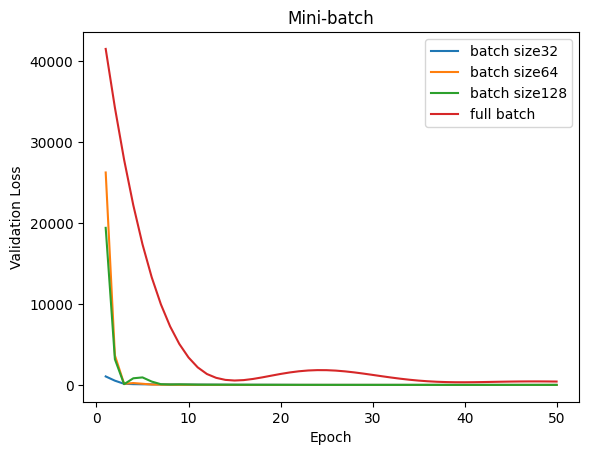

In [23]:
batch_search_space=[32,64,128,float('inf')]
#let float('inf') represents full batch
batch_search_hist=[]
for batch_s in batch_search_space:
  _,train_losses,val_losses=main_model_training(best_param,best_lr,best_no_layer,batch_s,50,'Adam')
  if batch_s==float('inf'):
    plt.plot(list(range(1, len(val_losses) + 1)), val_losses, label='full batch')
  else:
    plt.plot(list(range(1, len(val_losses) + 1)), val_losses, label='batch size'+str(batch_s))
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Mini-batch')
plt.legend()
plt.show()

Mini-batch provides much faster convergence.

**Testing**

In [ ]:
model_final,train_losses,val_losses=main_model_training(best_param,best_lr,best_no_layer,128,500,'Adam')

Epoch 1/500, Training Loss: 4146.45166015625, Validation Loss: 4088.853759765625
Epoch 11/500, Training Loss: 2.184990644454956, Validation Loss: 2.2397289276123047
Epoch 21/500, Training Loss: 1.1847925186157227, Validation Loss: 1.432897925376892
Epoch 31/500, Training Loss: 0.9920303821563721, Validation Loss: 1.1748311519622803
Epoch 41/500, Training Loss: 0.8969025015830994, Validation Loss: 1.0408380031585693
Epoch 51/500, Training Loss: 0.8475087285041809, Validation Loss: 0.979087769985199
Epoch 61/500, Training Loss: 0.817603349685669, Validation Loss: 0.9439857006072998
Epoch 71/500, Training Loss: 0.796252965927124, Validation Loss: 0.9183847308158875
Epoch 81/500, Training Loss: 0.7779398560523987, Validation Loss: 0.8957890868186951
Epoch 91/500, Training Loss: 0.7644702196121216, Validation Loss: 0.8791749477386475
Epoch 101/500, Training Loss: 0.7517381310462952, Validation Loss: 0.8630229830741882
Epoch 111/500, Training Loss: 0.7381576299667358, Validation Loss: 0.8475

In [ ]:
metric = torch.nn.L1Loss()
test_outputs = model_final(x_test_tensor)
metric_output = metric(test_outputs, y_test_tensor)
print(metric_output)

tensor(0.6397, grad_fn=<MeanBackward0>)


By using Mean Average Error, the performance of the model = 0.6397

In [ ]:
print(model_final)

pricePredictor_4layer(
  (fc1): Linear(in_features=3, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
summary(model_final,(3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 8]              32
            Linear-2                    [-1, 8]              72
            Linear-3                   [-1, 32]             288
            Linear-4                    [-1, 1]              33
Total params: 425
Trainable params: 425
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
